# 1.Data Preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
#plt.style.use('seaborn')
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [3]:
car=pd.read_csv('AutoData.csv')
car.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


# Summary of Dataset

In [4]:
print('Rows     :',car.shape[0])
print('Columns  :',car.shape[1])
print('\nFeatures :\n     :',car.columns.tolist())
print('\nMissing values    :',car.isnull().values.sum())
print('\nUnique values :  \n',car.nunique())

Rows     : 205
Columns  : 26

Features :
     : ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

Missing values    : 0

Unique values :  
 symboling              6
normalized-losses     52
make                  22
fuel-type              2
aspiration             2
num-of-doors           3
body-style             5
drive-wheels           3
engine-location        2
wheel-base            53
length                75
width                 44
height                49
curb-weight          171
engine-type            7
num-of-cylinders       7
engine-size           44
fuel-system            8
bore                  39
stroke                37
compression-ratio     32
horsepower            60


# Missing Values

In [5]:
total = car.isnull().sum().sort_values(ascending=False)
percent = ((car.isnull().sum())*100)/car.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'], sort=False).sort_values('Total', ascending=False)
missing_data.head(40)

,Total,Percent
symboling,0,0.0
normalized-losses,0,0.0
make,0,0.0
fuel-type,0,0.0
aspiration,0,0.0
num-of-doors,0,0.0
body-style,0,0.0
drive-wheels,0,0.0
engine-location,0,0.0
wheel-base,0,0.0


# 2.Handling Missing Values

In [6]:
a=car[car['normalized-losses']!='?']
b=(a['normalized-losses'].astype(int)).mean()
car['normalized-losses']=car['normalized-losses'].replace('?',b).astype(int)

# Cleaning num-of-doors

In [7]:
a=car[car['body-style']=='sedan']
a['num-of-doors'].value_counts()

four    79
two     15
?        2
Name: num-of-doors, dtype: int64

In [8]:
a=car['num-of-doors'].map({'two':2,'four':4,'?':4})
car['num-of-doors']=a

# Cleaning Price,Horse Power,Bore,Stroke and Peak RPM

In [9]:
a=car[car['price']!='?']
b=(a['price'].astype(int)).mean()
car['price']=car['price'].replace('?',b).astype(int)

a=car[car['horsepower']!='?']
b=(a['horsepower'].astype(int)).mean()
car['horsepower']=car['horsepower'].replace('?',b).astype(int)

a=car[car['bore']!='?']
b=(a['bore'].astype(float)).mean()
car['bore']=car['bore'].replace('?',b).astype(float)

a=car[car['stroke']!='?']
b=(a['stroke'].astype(float)).mean()
car['stroke']=car['stroke'].replace('?',b).astype(float)

a=car[car['peak-rpm']!='?']
b=(a['peak-rpm'].astype(float)).mean()
car['peak-rpm']=car['peak-rpm'].replace('?',b).astype(float)

# Cleaning the Number of Cylinders

In [10]:
a=car['num-of-cylinders'].map({'four':4,'five':5,'six':6,'?':4})
car['num-of-doors']=a

# Getting the basic stats of the data

In [11]:
car.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
normalized-losses,205.0,122.000000,31.681008,65.00,101.00,122.00,137.00,256.00
num-of-doors,194.0,4.304124,0.679289,4.00,4.00,4.00,4.00,6.00
wheel-base,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curb-weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
engine-size,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
bore,205.0,3.329751,0.270844,2.54,3.15,3.31,3.58,3.94


# 3.Exploratory Data Analysis

## Make

<AxesSubplot:ylabel='make'>

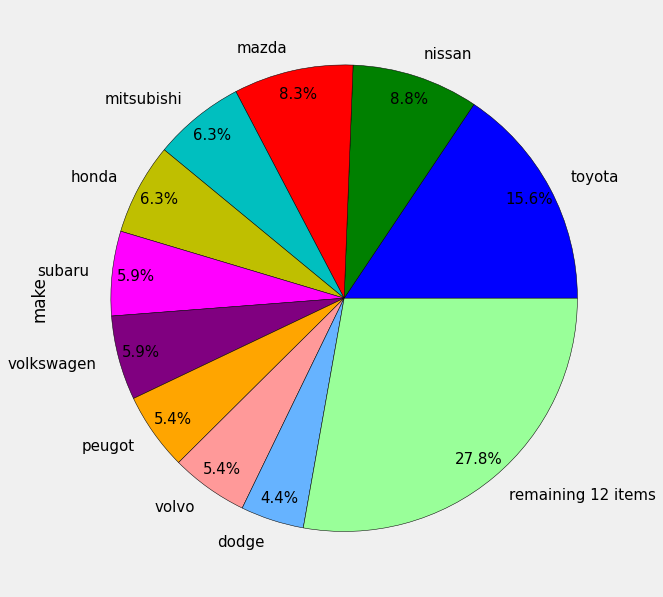

In [12]:
colors = ['b','g','r','c','y','magenta','purple','orange','#ff9999','#66b3ff','#99ff99']
temp = car['make'].value_counts()
temp2 = temp.head(10)
if len(temp) > 10:
   temp2['remaining {0} items'.format(len(temp)-10)] = sum(temp[10:])
temp2.plot(kind='pie',autopct="%1.1f%%",shadow=False,fontsize=15,pctdistance=0.9,colors=colors,wedgeprops={"edgecolor":"0","linewidth":0.5,"linestyle":"solid","antialiased":True},figsize=(15,10)) 

# Fuel Type

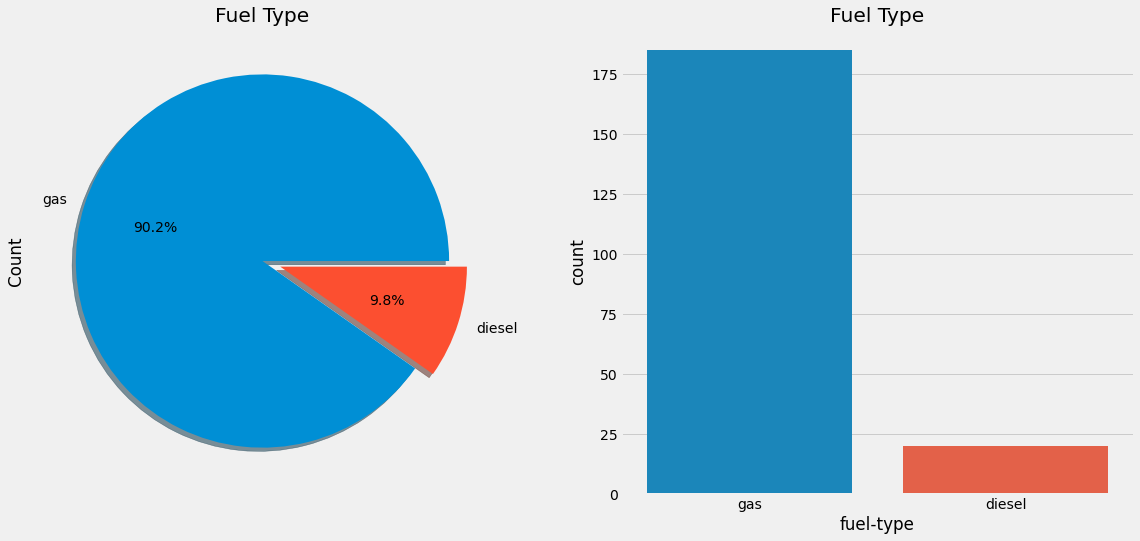

In [13]:
pd.crosstab(car.make,car['fuel-type'],margins=True).T.style.background_gradient(cmap='summer_r')

f,ax=plt.subplots(1,2,figsize=(18,8))
car['fuel-type'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Fuel Type')
ax[0].set_ylabel('Count')
sns.countplot('fuel-type',data=car,ax=ax[1],order=car['fuel-type'].value_counts().index)
ax[1].set_title('Fuel Type')
plt.show()


# Cars of different make in the data set

In [14]:
print('Car makers in the data set are',car['make'].unique())

Car makers in the data set are ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']


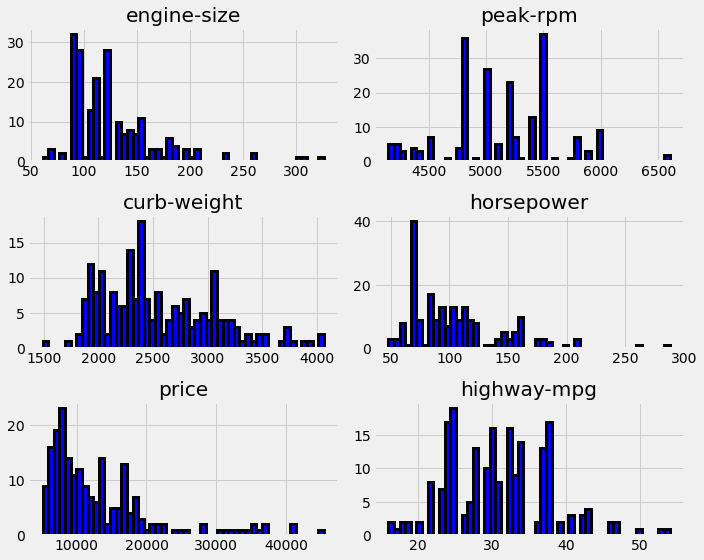

In [15]:
car[['engine-size','peak-rpm','curb-weight','horsepower','price','highway-mpg']].hist(figsize=(10,8),bins=50,color='b',linewidth='3',edgecolor='k')
plt.tight_layout()
plt.show()

# Which Make of Car is More?

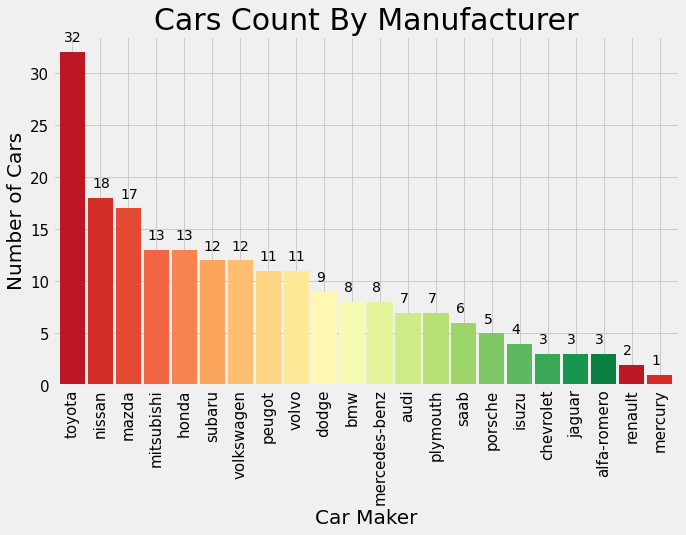

In [16]:
plt.subplots(figsize=(10,6))
ax=car['make'].value_counts().plot.bar(width=0.9,color=sns.color_palette('RdYlGn',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.xticks(rotation='vertical')
plt.xlabel('Car Maker',fontsize=20)
plt.ylabel('Number of Cars',fontsize=20)
plt.title('Cars Count By Manufacturer',fontsize=30)
ax.tick_params(labelsize=15)
#plt.yticks(rotation='vertical')
plt.show()
plt.show()

# Cars by Body Type

In [17]:
print('Different types of cars',car['body-style'].unique())

Different types of cars ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']


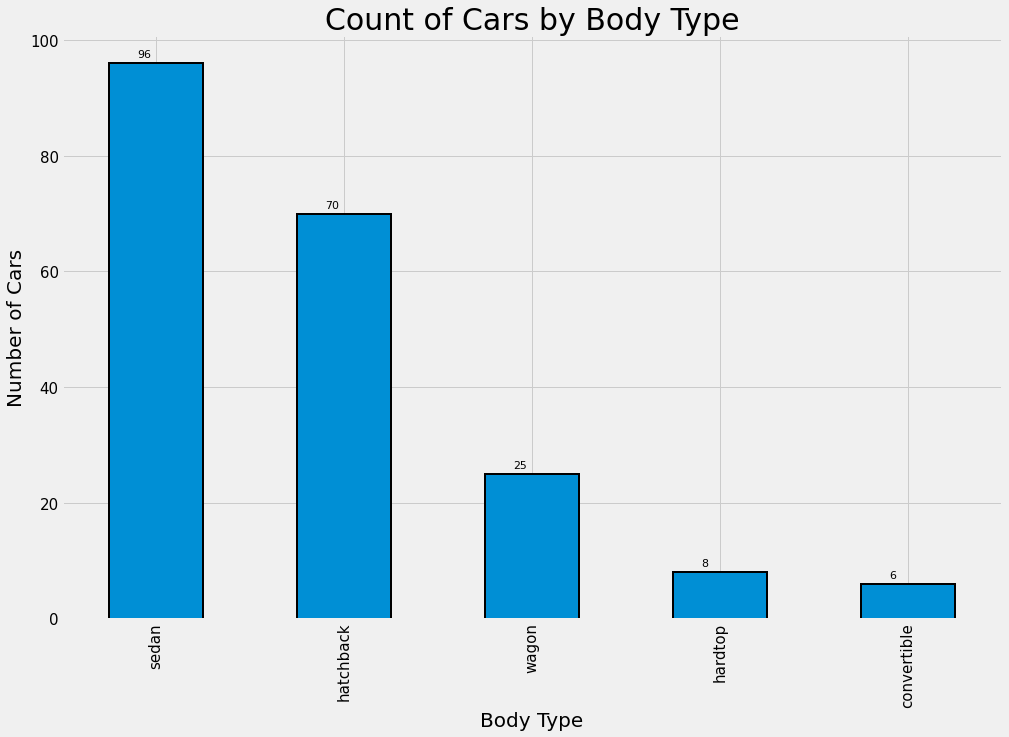

In [18]:

fig = plt.figure(figsize=(15, 10))
cars_type=car.groupby(['body-style']).count()['make']
ax=cars_type.sort_values(ascending=False).plot.bar(edgecolor='k',linewidth=2)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1),fontsize=11)
plt.xticks(rotation='vertical')
plt.xlabel('Body Type',fontsize=20)
plt.ylabel('Number of Cars',fontsize=20)
plt.title('Count of Cars by Body Type',fontsize=30)
ax.tick_params(labelsize=15)
#plt.yticks(rotation='vertical')
plt.show()

# 4.Building Machine Learning Model

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # for spliting the data into training and test set
from sklearn import metrics # for validating the accuracy of the model

In [20]:
car.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [21]:
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

NameError: name 'X' is not defined

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state= 10)

print('Training Set:',len(X_train))
print('Test Set:',len(X_test))
print('Training labels:',len(y_train))
print('Test labels:',len(y_test))

NameError: name 'X' is not defined

In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

NameError: name 'X_train' is not defined

# 5.Model Evaluation

In [24]:
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error
'''Get Predictions & Print Metrics'''
predicts = lr.predict(X_test)
print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, predicts)),
        r2_score(y_test,predicts),
        mean_absolute_error(y_test,predicts)
        ))

NameError: name 'X_test' is not defined

In [25]:
from sklearn.metrics import mean_squared_error
import math
rmse = math.sqrt(mean_squared_error(y_test,predicts))
print('RMSE of the model:',rmse)

NameError: name 'y_test' is not defined

In [26]:
r2_train = lr.score(X_train,y_train)
r2_test = lr.score(X_test,y_test)
print('R Squared Error for Train set:',r2_train)
print('R Squared Error for Test set:',r2_test)

NameError: name 'X_train' is not defined

In [27]:
error = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': predicts.flatten()}).head(20)

error.head(5)
'''Plotly Visualizations'''
import plotly as plotly                # Interactive Graphing Library for Python
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)


title=['Pred vs Actual']
fig = go.Figure(data=[
    go.Bar(name='Predicted', x=error.index, y=error['Predicted Values']),
    go.Bar(name='Actual', x=error.index, y=error['Actual Values'])
])

fig.update_layout(barmode='group')
fig.show()


NameError: name 'y_test' is not defined